In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [75]:
df = pd.read_pickle('../data/unsw-small.pickle')
df.to_csv('../data/unsw-small.csv')
df_label = pd.DataFrame(df.label)

# Arrange Data into Features Matrix and Target Vector
#X = df.loc[:, df.columns != 'label']
#y = df.loc[:, 'label'].values

#df_train = pd.read_csv('AI_Cybersecurity_IDS_PoC/analysis/UNSW_NB15_training-set.csv')
#df_test = pd.read_csv('AI_Cybersecurity_IDS_PoC/analysis/UNSW_NB15_testing-set.csv')

In [9]:
df

,duration,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,0.121478,6,258,4,172,0
1,0.649902,14,734,38,42014,0
2,1.623129,8,364,16,13186,0
3,1.681642,12,628,12,770,0
4,0.449454,10,534,6,268,0
...,...,...,...,...,...,...
257668,0.000005,2,104,0,0,0
257669,1.106101,20,18062,8,354,0
257670,0.000000,1,46,0,0,0
257671,0.000000,1,46,0,0,0


In [11]:
#df = df.drop('label', axis = 1)
#category_col = ['proto', 'service', 'state', 'is_ftp_login', 'is_sm_ips_ports']
#numerical_col = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst']
#num_feature = df

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [14]:
#X_train = num_feature[num_feature.attack_cat==0].sample(10000)
##############
## Split into train+val and test
##############
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
X_train

,duration,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
150801,0.000003,2,114,0,0
132501,0.000003,2,114,0,0
164575,0.000005,2,114,0,0
8383,0.024262,38,2438,40,19266
140410,0.000002,2,220,0,0
...,...,...,...,...,...
178028,0.400177,12,876,22,22808
31626,6.789980,446,25056,858,1094788
111523,0.000000,1,46,0,0
46966,1.394000,6,978,2,86


In [16]:
y_train

150801    1
132501    1
164575    1
8383      0
140410    1
         ..
178028    1
31626     0
111523    0
46966     0
228071    1
Name: label, Length: 206138, dtype: int64

In [18]:
##############
## Min/Max Scaling
##############

scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val) # 
#X_test = scaler.transform(X_test)

#X_train, y_train = np.array(X_train), np.array(y_train)
#X_val, y_val = np.array(X_val), np.array(y_val)
#X_test, y_test = np.array(X_test), np.array(y_test)

In [19]:
X_train

,duration,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
150801,0.000003,2,114,0,0
132501,0.000003,2,114,0,0
164575,0.000005,2,114,0,0
8383,0.024262,38,2438,40,19266
140410,0.000002,2,220,0,0
...,...,...,...,...,...
178028,0.400177,12,876,22,22808
31626,6.789980,446,25056,858,1094788
111523,0.000000,1,46,0,0
46966,1.394000,6,978,2,86


In [21]:
X_train

,duration,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
150801,0.000003,2,114,0,0
132501,0.000003,2,114,0,0
164575,0.000005,2,114,0,0
8383,0.024262,38,2438,40,19266
140410,0.000002,2,220,0,0
...,...,...,...,...,...
178028,0.400177,12,876,22,22808
31626,6.789980,446,25056,858,1094788
111523,0.000000,1,46,0,0
46966,1.394000,6,978,2,86


Text(0.5, 1.0, 'Class Distribution in Test Set')

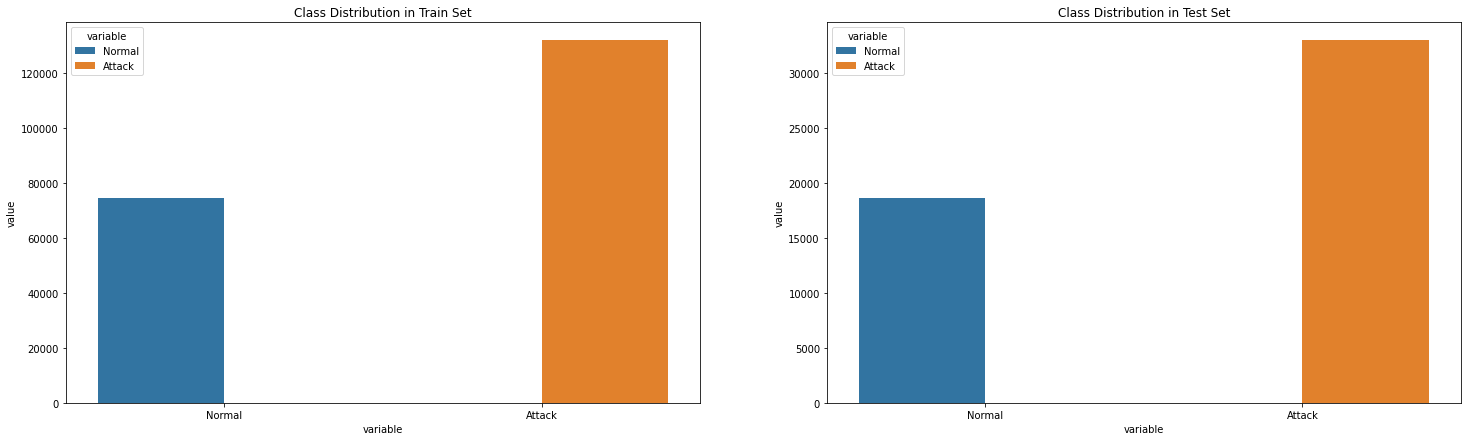

In [24]:
def get_class_distribution(obj):
    count_dict = {
        'Normal':0,
        'Attack':1,        
    }
    
    for i in obj:
        if i == 0: 
            count_dict['Normal'] += 1
        elif i == 1: 
            count_dict['Attack'] += 1        
        else:
            print("Check classes.")
            
    return count_dict

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,7))# Train
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Class Distribution in Train Set')# Validation
#sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_val)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Class Distribution in Val Set')# Test
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_test)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Class Distribution in Test Set')

In [25]:
#float(X_train['rate'])

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve


In [27]:
X_train

,duration,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
150801,0.000003,2,114,0,0
132501,0.000003,2,114,0,0
164575,0.000005,2,114,0,0
8383,0.024262,38,2438,40,19266
140410,0.000002,2,220,0,0
...,...,...,...,...,...
178028,0.400177,12,876,22,22808
31626,6.789980,446,25056,858,1094788
111523,0.000000,1,46,0,0
46966,1.394000,6,978,2,86


In [28]:
#del X_train['attack_cat']

In [66]:
rf = RandomForestClassifier(n_estimators=400,random_state=42,criterion='gini', max_leaf_nodes=40, max_depth=6)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [67]:
import joblib
joblib.dump(rf, "../model/random_forest.joblib")
loaded_rf = joblib.load("../model/random_forest.joblib")

In [68]:
X_train

,duration,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
150801,0.000003,2,114,0,0
132501,0.000003,2,114,0,0
164575,0.000005,2,114,0,0
8383,0.024262,38,2438,40,19266
140410,0.000002,2,220,0,0
...,...,...,...,...,...
178028,0.400177,12,876,22,22808
31626,6.789980,446,25056,858,1094788
111523,0.000000,1,46,0,0
46966,1.394000,6,978,2,86


In [69]:
X_test

,duration,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
147200,0.000009,2,114,0,0
22250,0.031928,72,4238,74,63516
11528,0.003120,6,320,8,1826
118913,1.158363,12,1466,10,808
87119,0.000003,2,168,0,0
...,...,...,...,...,...
9200,0.707798,108,9504,114,12298
140590,0.000005,2,180,0,0
242974,2.043880,14,756,14,768
109699,1.135932,10,1082,8,354


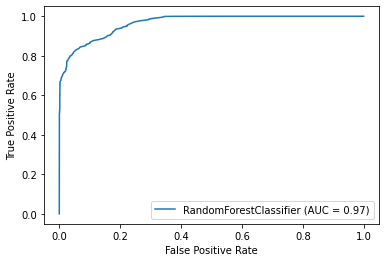

In [87]:
rf_disp = plot_roc_curve(rf, X_test, y_test)
plt.savefig('ROC_test_tiefer.png')


AttributeError: 'RocCurveDisplay' object has no attribute 'values_'

In [71]:
array_predict = rf.predict(X)

In [83]:
from sklearn.metrics import confusion_matrix
import joblib


In [84]:
loaded_rf = joblib.load("../model/random_forest.joblib")
cm = pd.DataFrame(confusion_matrix(y_test, loaded_rf.predict(X_test)), columns=["predicted no (TN-FN)","predicted yes (FP-TP)"], index=["actual no (TN-FP)","actual yes (FN-TP)"])

In [85]:
cm

,predicted no (TN-FN),predicted yes (FP-TP)
actual no (TN-FP),13132,5468
actual yes (FN-TP),489,32446


In [86]:
cm.to_pickle("../model/random_forest_confusionmatrix.pickle")

In [72]:
dddd = pd.DataFrame(array_predict)

In [73]:
dddd.describe()

,0
count,257673.000000
mean,0.735886
std,0.440861
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [38]:
X

,duration,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,0.121478,6,258,4,172
1,0.649902,14,734,38,42014
2,1.623129,8,364,16,13186
3,1.681642,12,628,12,770
4,0.449454,10,534,6,268
...,...,...,...,...,...
257668,0.000005,2,104,0,0
257669,1.106101,20,18062,8,354
257670,0.000000,1,46,0,0
257671,0.000000,1,46,0,0


In [39]:
type(rf_disp)
#type(plt.savefig('ROC_val_tiefer.png'))
#plt.show()

sklearn.metrics._plot.roc_curve.RocCurveDisplay

In [40]:
type(rf_disp.figure_)

matplotlib.figure.Figure

In [90]:
nice = rf_disp.line_

#['xdata']
#ydata


In [91]:
xdata = nice.get_xdata()
ydata = nice.get_ydata()
xydata = nice.get_xydata()

In [92]:
new = ydata

In [93]:
dfroc = pd.DataFrame(xydata, columns=[['x','y']])


In [141]:
dfroc.to_pickle('../random_forest_roc-Coords2D.csv')

In [135]:
xdata

array([0.        , 0.00145161, 0.00177419, ..., 0.89451613, 0.99989247,
       1.        ])

In [136]:
ydata.tolist('')

array([0.        , 0.5246698 , 0.58147867, ..., 1.        , 1.        ,
       1.        ])

In [104]:
type(plt.savefig('ROC_val_tiefer.png'))

NoneType

<Figure size 432x288 with 0 Axes>